In [1]:
import numpy as np
import sphereint as sphint
import matplotlib.pyplot as plt

In [2]:
L = 1000
radiusA = L/3
volumeA = (4 * np.pi * radiusA**3) / 3
radiusB = L/10
volumeB = (4 * np.pi * radiusB**3) / 3
radiusC = L/30
volumeC = (4 * np.pi * radiusC**3) / 3

allNs = np.array([int(np.ceil(i)) for i in np.geomspace(10, 100, 10)])
errA, errB, errC = [], [], []
for N in allNs:
    centre = [int(N/4), int(2*N/4), int(3*N/4)]
    SINT = sphint.SphereIntegrate(N, L, centre)
    dx = L/N
    cell_volume = dx**3
    #A
    weights = SINT.get_box_weights(radiusA)
    volume_num = np.sum(weights * cell_volume)
    errA += [abs(volume_num / volumeA - 1)]
    #B
    weights = SINT.get_box_weights(radiusB)
    volume_num = np.sum(weights * cell_volume)
    errB += [abs(volume_num / volumeB - 1)]
    #C
    weights = SINT.get_box_weights(radiusC)
    volume_num = np.sum(weights * cell_volume)
    errC += [abs(volume_num / volumeC - 1)]

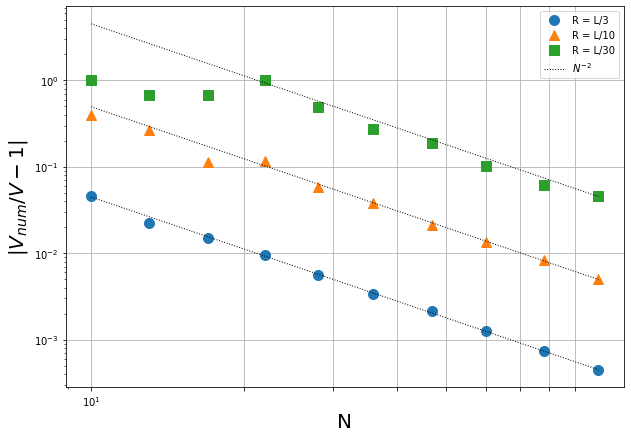

In [3]:
plt.figure(figsize=(10,7))

plt.plot(allNs, errA, marker='o', markersize=10, label='R = L/3', linewidth=0)
order2 = [errA[-1]*((allNs[-1]/N)**2) for N in allNs]
plt.loglog(allNs, order2, 'k:', linewidth=1)

plt.plot(allNs, errB, marker='^', markersize=10, label='R = L/10', linewidth=0)
order2 = [errB[-1]*((allNs[-1]/N)**2) for N in allNs]
plt.loglog(allNs, order2, 'k:', linewidth=1)

plt.plot(allNs, errC, marker='s', markersize=10, label='R = L/30', linewidth=0)
order2 = [errC[-1]*((allNs[-1]/N)**2) for N in allNs]
plt.loglog(allNs, order2, 'k:', linewidth=1, label=r'$N^{-2}$')

plt.grid()
plt.legend()
ticks = np.arange(10, 100, 10)
plt.xticks(ticks, label=[str(ti) for ti in ticks])
plt.xlabel('N', fontsize=20)
plt.ylabel(r'$|V_{num}/V-1|$', fontsize=20)
#plt.savefig('convergence.pdf')